In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [2]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

os.environ["CUDA_VISIBLE_DEVICES"]="0"

Default GPU Device:/device:GPU:0


In [3]:
data_dir = './data'
category_list = sorted(os.listdir(data_dir)) 

cate2Idx = {}
for i in range(len(category_list)):
  cate2Idx[category_list[i]] = i
print(cate2Idx)

{'battle': 0, 'battle_end': 1, 'battle_load_color': 2, 'battle_load_gray': 3, 'black': 4, 'end': 5, 'end_icon': 6, 'main': 7, 'sanity': 8, 'team': 9}


In [4]:
def data_preprocessing(data_dir, cate2Idx):
  x = []
  y = []
  for i in range(len(cate2Idx)):
    img_names = sorted(os.listdir('{}/{}'.format(data_dir, category_list[i])))
    for j in range(len(img_names)):
      img = cv2.imread('{}/{}/{}'.format(data_dir,category_list[i],img_names[j]))
      img = cv2.resize(img,(384,224))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      x.append(img)
      y.append(i)
  x = np.asarray(x)
  y = np.asarray(y)
  return x, y

In [5]:
x, y = data_preprocessing(data_dir, cate2Idx) 
print(x.shape, y.shape)                   

(4795, 224, 384, 3) (4795,)


In [6]:
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2)
y = np_utils.to_categorical(y, len(category_list))
y_test = np_utils.to_categorical(y_test, len(category_list))

In [7]:
def get_datagen():
  datagen = ImageDataGenerator(     # no special data generator as the data is very consistent
    )
  return datagen

In [8]:
datagen = get_datagen()   
datagen.fit(x)      
train_generator = datagen.flow(x, y, batch_size=32)


In [9]:
def custom_model():
  model = Sequential(
    [Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 384, 3)),  
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),                            
    MaxPooling2D(pool_size=(2, 2)), 
    Dropout(0.1),    
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),       
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),                                                 
    MaxPooling2D(pool_size=(2, 2)), 
    Dropout(0.1),          
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),       
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),                                                 
    MaxPooling2D(pool_size=(2, 2)), 
    Dropout(0.1),                                                                                                       
    Flatten(),                                                                    
    Dense(units=256, activation='relu'),                                               
    Dense(units=len(cate2Idx), activation='softmax')]                                          
  )

  return model

In [10]:
model = custom_model()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=len(x)/32, epochs=10)
score = model.evaluate(x, y, verbose=1)

model_name = 'status_detection_model.h5'              
model.save(model_name, save_format='h5')  

Epoch 1/10
119/119 [==============================] - 23s 129ms/step - loss: 6.9587 - accuracy: 0.6262 - val_loss: 7.9127e-05 - val_accuracy: 1.0000
Epoch 2/10
119/119 [==============================] - 14s 113ms/step - loss: 6.6958e-05 - accuracy: 1.0000 - val_loss: 2.6008e-05 - val_accuracy: 1.0000
Epoch 3/10
119/119 [==============================] - 14s 114ms/step - loss: 7.7000e-06 - accuracy: 1.0000 - val_loss: 1.7727e-05 - val_accuracy: 1.0000
Epoch 4/10
119/119 [==============================] - 14s 114ms/step - loss: 8.5558e-06 - accuracy: 1.0000 - val_loss: 9.3182e-06 - val_accuracy: 1.0000
Epoch 5/10
119/119 [==============================] - 14s 115ms/step - loss: 4.9617e-06 - accuracy: 1.0000 - val_loss: 5.6036e-06 - val_accuracy: 1.0000
Epoch 6/10
119/119 [==============================] - 14s 115ms/step - loss: 4.0681e-06 - accuracy: 1.0000 - val_loss: 4.6764e-06 - val_accuracy: 1.0000
Epoch 7/10
119/119 [==============================] - 14s 115ms/step - loss: 2.0455e-0

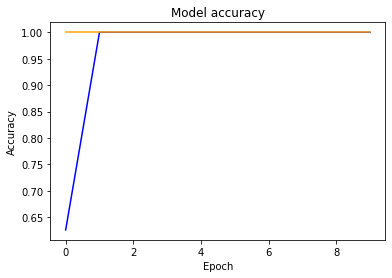

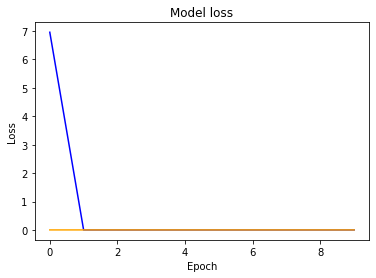

In [11]:
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='orange')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='orange')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [25]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 382, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 380, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 190, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 190, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 188, 32)      18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 186, 64)      18496     
                                                        